In [2]:
import numpy as np
import sys
sys.path.append(
    '/global/u1/s/sfschen/Python/velocileptors/')

from matplotlib import pyplot as plt
from compute_xiell_tables import compute_xiell_tables

In [15]:
import json
# Let's reproduce things by reloading the saved file
json_file = open('emu/boss_z_0.38_xiells.json', 'r')
emu = json.load( json_file )
json_file.close()

In [20]:
emu.keys()

dict_keys(['params', 'x0', 'rvec', 'derivs0', 'derivs2'])

In [16]:
from taylor_approximation import taylor_approximate
import time
test_point = [0.28, 0.70, 0.65]

x0s = emu['x0']
derivs0 = [np.array(ll) for ll in emu['derivs0']]
derivs2 = [np.array(ll) for ll in emu['derivs2']]

t1 = time.time()
p0test = taylor_approximate(test_point, x0s, derivs0, order=4)
p2test = taylor_approximate(test_point, x0s, derivs2, order=4)
t2 = time.time()
print(t2-t1)

0.007138967514038086


In [17]:
p0, p2 = compute_xiell_tables(test_point, z=0.38, fid_dists=np.loadtxt('fid_dists_z_0.38.txt'), dr=0.5)

129 190
129 190


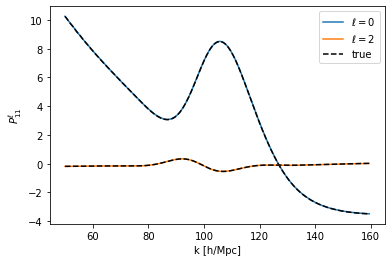

In [18]:
ii = 0

rr = np.arange(50,160,0.5)

plt.plot(rr, rr**2 * p0test[:,ii], label=r'$\ell=0$')
plt.plot(rr, rr**2 * p0[:,ii], 'k--')

plt.plot(rr, rr**2 * p2test[:,ii], label=r'$\ell=2$')
plt.plot(rr, rr**2 * p2[:,ii], 'k--', label='true')

plt.xlabel('k [h/Mpc]')
plt.ylabel(r'$P^\ell_{11}$')
plt.legend()

Text(0, 0.5, '$\\Delta P_\\ell /P_\\ell$')

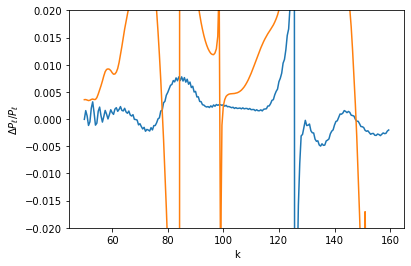

In [13]:
plt.plot(rr, p0test[:,ii]/p0[:,ii]-1)
plt.plot(rr, p2test[:,ii]/p2[:,ii]-1)

plt.ylim(-0.02,0.02)
plt.xlabel('k')
plt.ylabel(r'$\Delta P_\ell /P_\ell$')

In [7]:
emu['kvec']

[0.0005,
 0.0015000000000000005,
 0.002050464389294801,
 0.0028029361411774025,
 0.0038315471619677684,
 0.005237634007678977,
 0.007159721344603434,
 0.009787169102922162,
 0.013378827811698826,
 0.018288539998930223,
 0.025000000000000005,
 0.03,
 0.04,
 0.05,
 0.060000000000000005,
 0.07,
 0.08000000000000002,
 0.09000000000000001,
 0.1,
 0.11000000000000001,
 0.12000000000000002,
 0.13,
 0.14,
 0.15000000000000002,
 0.16000000000000003,
 0.17,
 0.18000000000000002,
 0.19000000000000003,
 0.20000000000000004,
 0.21000000000000005,
 0.22000000000000003,
 0.23000000000000004,
 0.24000000000000005,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29000000000000004,
 0.30000000000000004,
 0.31000000000000005,
 0.32000000000000006,
 0.33000000000000007,
 0.3400000000000001,
 0.3500000000000001,
 0.3600000000000001,
 0.3700000000000001,
 0.3800000000000001,
 0.3900000000000001,
 0.4,
 0.41000000000000003,
 0.42000000000000004,
 0.43000000000000005,
 0.44000000000000006,
 0.45000000000000007,
 0.46000000000